# Library

In [3]:
pip install scikit-fuzzy

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     - ------------------------------------- 30.7/994.0 kB 1.3 MB/s eta 0:00:01
     - ------------------------------------- 30.7/994.0 kB 1.3 MB/s eta 0:00:01
     - ----------------------------------- 41.0/994.0 kB 279.3 kB/s eta 0:00:04
     ---- ------------------------------- 122.9/994.0 kB 599.1 kB/s eta 0:00:02
     ----- ------------------------------ 163.8/994.0 kB 817.0 kB/s eta 0:00:02
     ------ ----------------------------- 174.1/994.0 kB 655.4 kB/s eta 0:00:02
     ------- ---------------------------- 204.8/994.0 kB 621.6 kB/s eta 0:00:02
     -------- --------------------------- 225.3/994.0 kB 597.3 kB/s eta 0:00:02
     -------- --------------------------- 225.3/994.0 kB 597.3 kB/s eta 0:00:02
     -------- --------------------------- 225.3/994.0 kB 597.3 kB/s eta 0:00:02
     -------- --------------------------- 225.3/994.0 kB 597.3 kB/s eta 0:00:02
     -------- --------------------------- 225.3

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy import cmeans
from datetime import datetime

# Load Data

In [6]:
data = pd.read_csv('Mall_Customers.csv')

# Menampilkan beberapa baris awal dari dataset
print("Data Awal:")
print(data.head())

Data Awal:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Pra-pemrosesan data

In [7]:
# Menghapus kolom yang tidak diperlukan
data = data.drop(columns=['CustomerID'])

# Mengubah kolom Gender menjadi numerik
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Menampilkan tipe data dan info umum
print("\nInfo Data:")
print(data.info())


Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None


In [8]:
# Menampilkan statistik deskriptif
print("\nStatistik Deskriptif:")
print(data.describe())


Statistik Deskriptif:
           Gender         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.560000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      1.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000           78.000000               73.000000
max      1.000000   70.000000          137.000000               99.000000


# Visualisasi Data

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


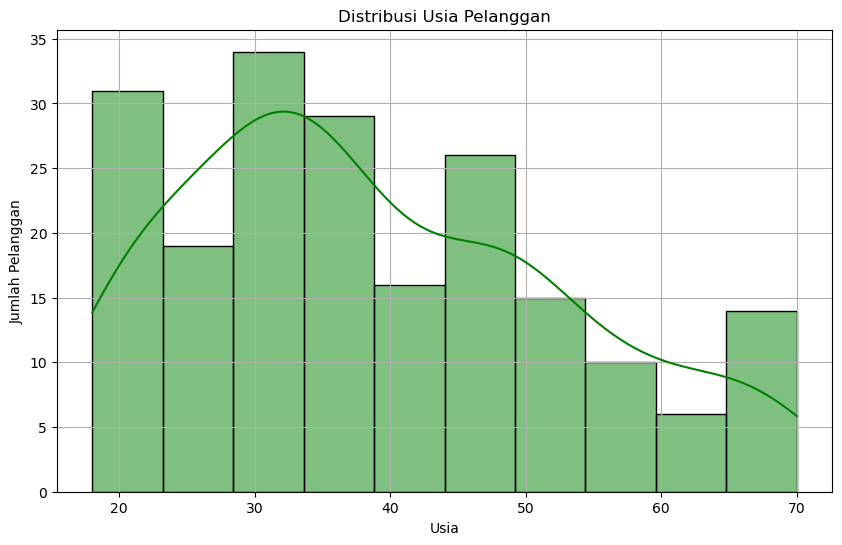

In [13]:
# Visualisasi distribusi usia
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=10, kde=True, color='green')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


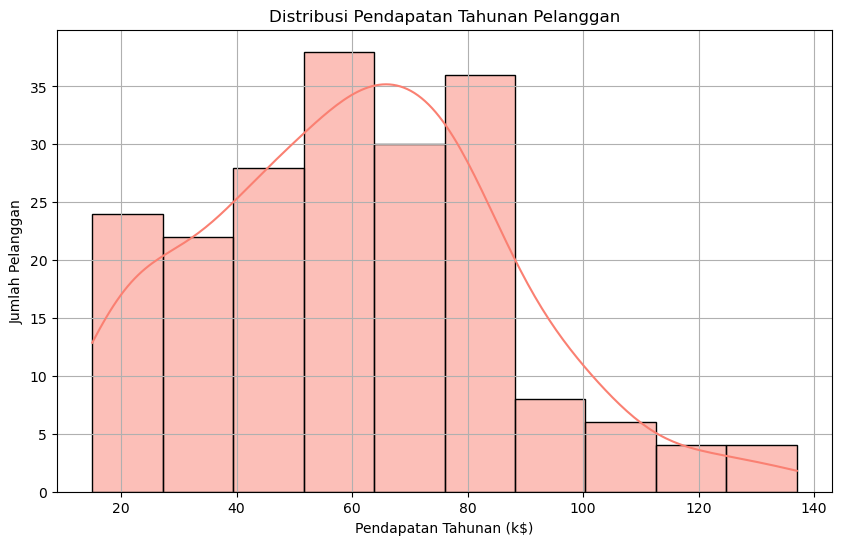

In [14]:
# Visualisasi distribusi pendapatan tahunan
plt.figure(figsize=(10, 6))
sns.histplot(data['Annual Income (k$)'], bins=10, kde=True, color='salmon')
plt.title('Distribusi Pendapatan Tahunan Pelanggan')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


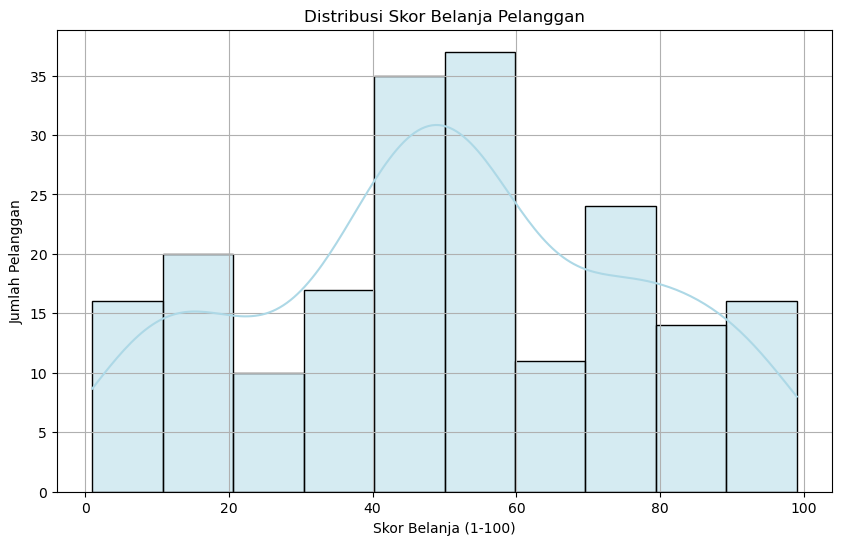

In [16]:
# Visualisasi distribusi skor belanja
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True, color='lightblue')
plt.title('Distribusi Skor Belanja Pelanggan')
plt.xlabel('Skor Belanja (1-100)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

# Pra-Pemrosesan Fitur untuk Klasterisasi

In [17]:
# Memilih fitur yang akan digunakan
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standarisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Klasterisasi Menggunakan Fuzzy C-Means

In [19]:
# Parameter
n_clusters = 5
m = 2  # Parameter fuzziness

# Mengaplikasikan Fuzzy C-Means
centers, u, u0, d, jm, p, fpc = cmeans(scaled_features.T, n_clusters, m, error=0.005, maxiter=1000, init=None)

# Menentukan klaster
cluster_membership = np.argmax(u, axis=0)
data['Fuzzy Cluster'] = cluster_membership

# Visualisasi Hasil Klasterisasi

# Analisis Klaster

In [22]:
# Menampilkan statistik deskriptif untuk setiap klaster
cluster_stats = data.groupby('Fuzzy Cluster').mean()
print("\nStatistik Deskriptif untuk Setiap Klaster:")
print(cluster_stats)


Statistik Deskriptif untuk Setiap Klaster:
                 Gender        Age  Annual Income (k$)  Spending Score (1-100)
Fuzzy Cluster                                                                 
0              0.413793  62.689655           49.758621               44.034483
1              0.525000  32.550000           86.050000               81.475000
2              0.591837  24.204082           38.938776               62.551020
3              0.472222  39.888889           87.666667               17.722222
4              0.717391  44.086957           47.021739               39.152174


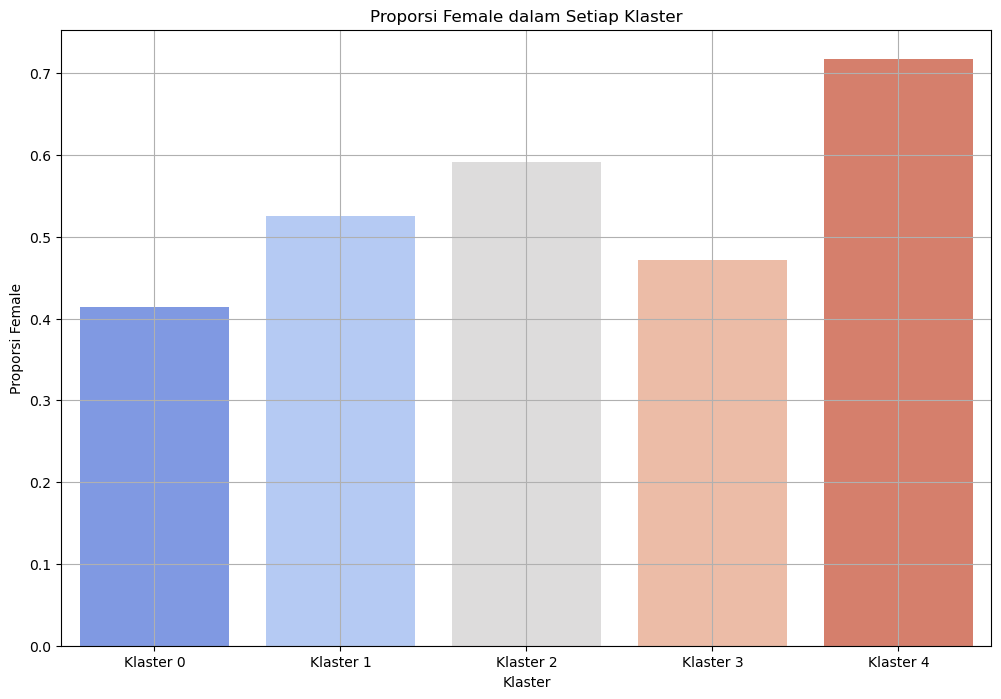

In [23]:
# 1. Bar Chart untuk Proporsi Gender di Setiap Klaster
plt.figure(figsize=(12, 8))
gender_proportion = data.groupby('Fuzzy Cluster')['Gender'].mean()
sns.barplot(x=gender_proportion.index, y=gender_proportion.values, palette='coolwarm')
plt.title('Proporsi Female dalam Setiap Klaster')
plt.xlabel('Klaster')
plt.ylabel('Proporsi Female')
plt.xticks(ticks=gender_proportion.index, labels=[f'Klaster {i}' for i in gender_proportion.index])
plt.grid(True)
plt.show()

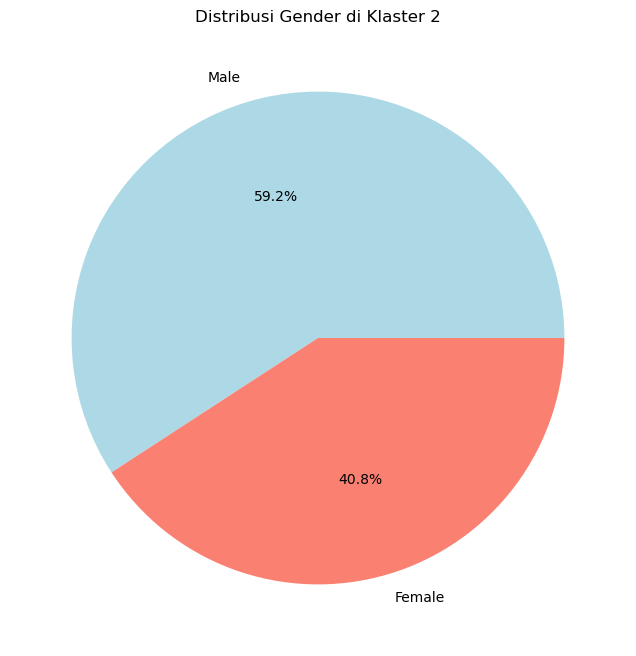

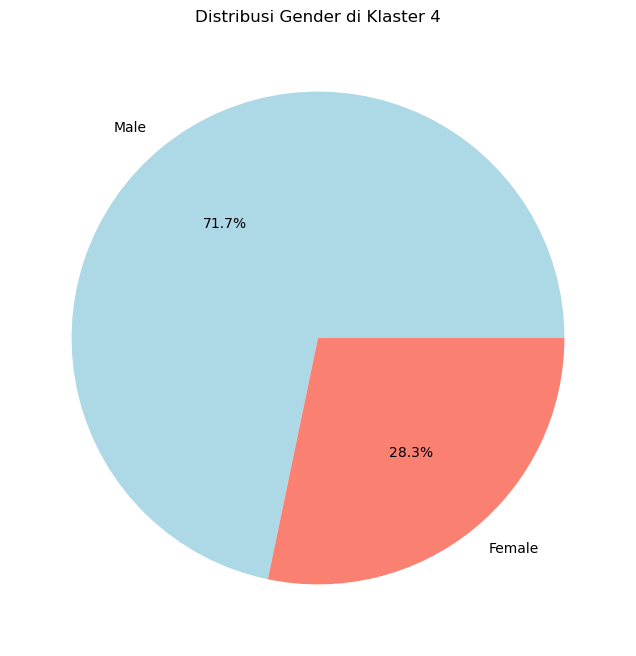

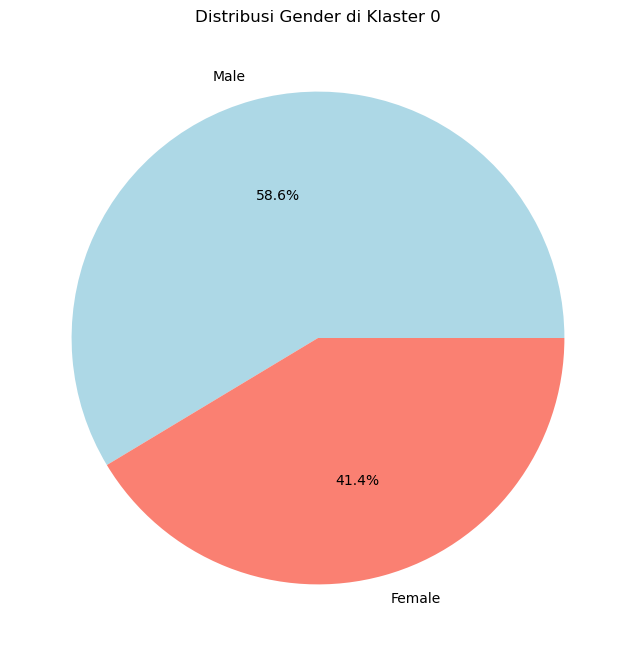

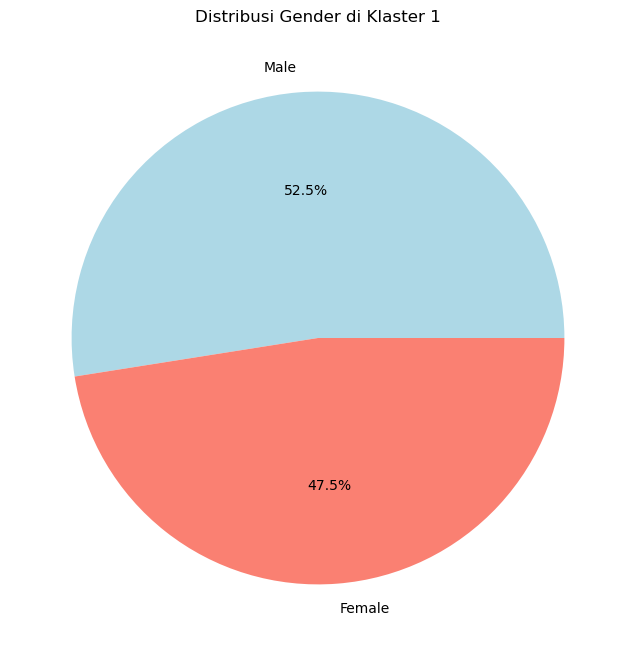

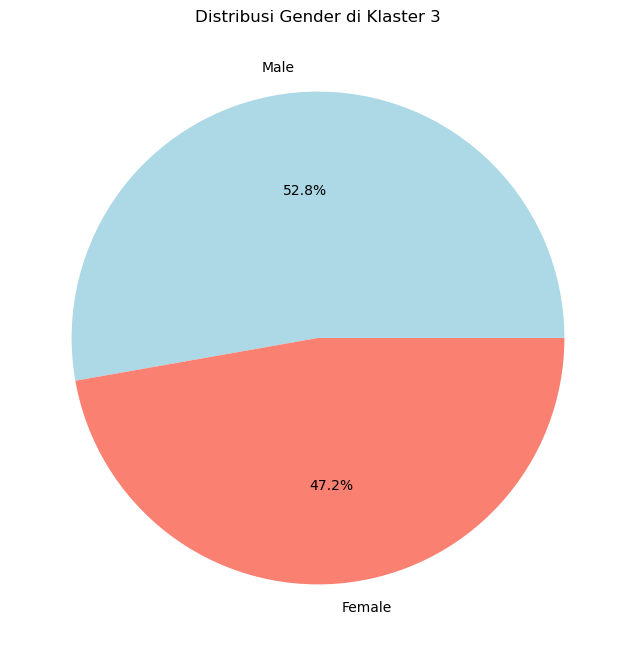

In [25]:
# 3. Pie Chart untuk Distribusi Gender di Setiap Klaster
# Menampilkan Pie Chart untuk satu klaster
for cluster in data['Fuzzy Cluster'].unique():
    plt.figure(figsize=(8, 8))
    cluster_data = data[data['Fuzzy Cluster'] == cluster]
    gender_counts = cluster_data['Gender'].value_counts()
    plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
    plt.title(f'Distribusi Gender di Klaster {cluster}')
    plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


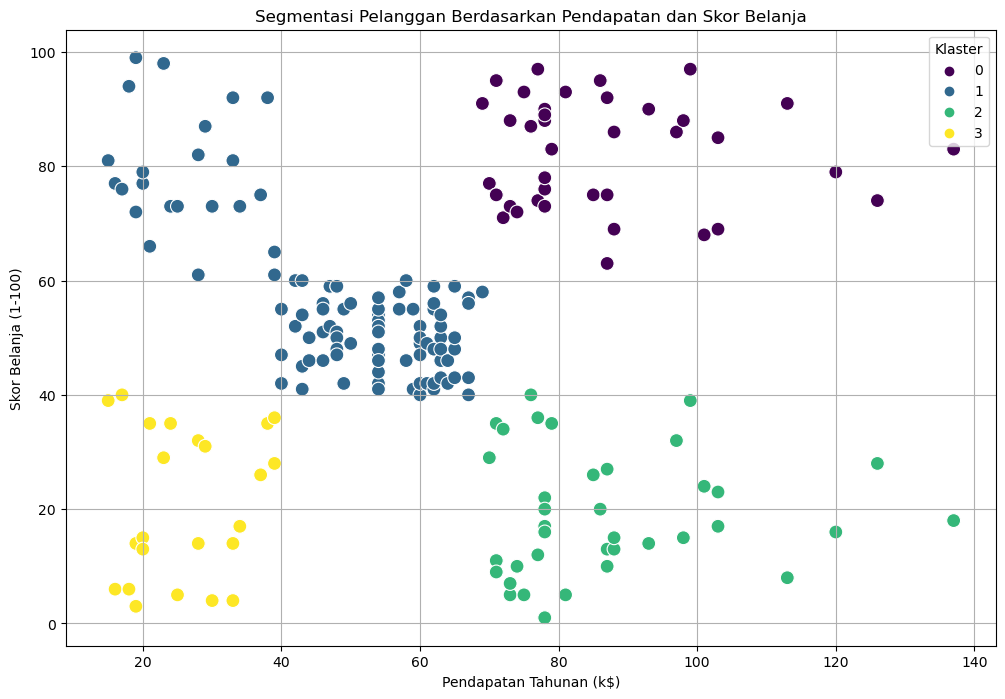

Statistik Deskriptif per Klaster:
        Annual Income (k$)                     Spending Score (1-100)  \
                      mean        std min  max                   mean   
Cluster                                                                 
0                86.538462  16.312485  69  137              82.128205   
1                48.260000  14.562731  15   69              56.480000   
2                87.000000  16.271348  70  137              18.631579   
3                26.304348   7.893811  15   39              20.913043   

                            
               std min max  
Cluster                     
0         9.364489  63  97  
1        14.190963  40  99  
2        10.915947   1  40  
3        13.017167   3  40  


In [32]:
# Menyusun data untuk klasterisasi
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardisasi fitur
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Menentukan jumlah klaster (misalnya 4)
kmeans = KMeans(n_clusters=4, random_state=0)
data['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualisasi Klasterisasi
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data, s=100)
plt.title('Segmentasi Pelanggan Berdasarkan Pendapatan dan Skor Belanja')
plt.xlabel('Pendapatan Tahunan (k$)')
plt.ylabel('Skor Belanja (1-100)')
plt.legend(title='Klaster')
plt.grid(True)
plt.show()

# Statistik Deskriptif per Klaster
print("Statistik Deskriptif per Klaster:")
print(data.groupby('Cluster').agg({
    'Annual Income (k$)': ['mean', 'std', 'min', 'max'],
    'Spending Score (1-100)': ['mean', 'std', 'min', 'max']
}))
